In [1]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

In [2]:
infile = open('appended.pkl','rb')
df = pickle.load(infile)
infile.close()

In [3]:
df.columns

Index(['ID', 'UebungsID', 'satzID', 'Erstloesung', 'Schussel', 'Datum',
       'Erfolg', 'Schwierigkeit', 'Uhrzeit', 'Wochentag', 'Kalenderwoche',
       'Monat', 'Tag', 'ist_Schulzeit', 'MehrfachFalsch', 'luecke',
       'sessionNr', 'OrderNumber', 'vorher_abgebrochen', 'y', 'temp_ueb',
       'UserID', 'UserAttribut', 'Fehler', 'Klassenstufe', 'done',
       'Jahredabei', 'AnzahlAufgaben', 'Art__GK', 'Art__GR', 'Art__GZ',
       'Art__K', 'Art__LB', 'HA__HA', 'HA__Self', 'HA__nt', 'HA__vt', 'HA__zt',
       'Sex__m', 'Sex__w', 'Testposition__pruefung', 'Testposition__training',
       'Testposition__version'],
      dtype='object')

In [4]:
df_grouped = df.groupby('UebungsID').agg({'ID':'count','Erstloesung': 'sum', 'Schussel': 'sum', 'Erfolg': 'sum', 'Schwierigkeit': 'mean', 'ist_Schulzeit': 'first', 'MehrfachFalsch':'first', 'vorher_abgebrochen':'first', 'y':'first','UserAttribut':'first',
'Klassenstufe':'first', 'Jahredabei':'first', 'AnzahlAufgaben':'first', 'Art__GK':'first', 'Art__GR':'first', 'Art__GZ':'first',
       'Art__K':'first', 'Art__LB':'first', 'HA__HA':'first', 'HA__Self':'first', 'HA__nt':'first', 'HA__vt':'first', 'HA__zt':'first',
       'Sex__m':'first', 'Sex__w':'first', 'Testposition__pruefung':'sum', 'Testposition__training':'sum','Testposition__version':'sum'})

df_grouped['Fehler'] = df_grouped['ID'] - df_grouped['Erfolg']

df_grouped = df_grouped.reset_index()

In [5]:
#balance out dataset

df_grouped_1 = df_grouped[df_grouped.y == 1]
df_grouped_0 = df_grouped[df_grouped.y == 0]

df_grouped_1 = df_grouped_1.sample(n=100000)

df_grouped = df_grouped_1.append(df_grouped_0)

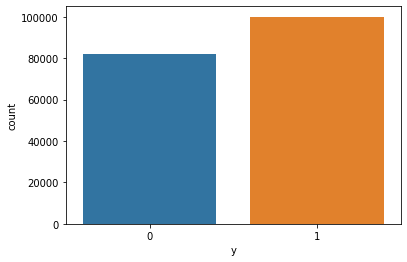

In [6]:
ax = sns.countplot(x='y',data=df_grouped)

In [7]:
feature_cols = ['ID','Erstloesung','Schussel','Erfolg', 'Schwierigkeit', 'ist_Schulzeit', 'MehrfachFalsch', 'vorher_abgebrochen','UserAttribut', 'Fehler', 'Klassenstufe', 'Jahredabei', 'AnzahlAufgaben', 'Art__GK', 'Art__GR', 'Art__GZ',
       'Art__K', 'Art__LB', 'HA__HA', 'HA__Self', 'HA__nt', 'HA__vt', 'HA__zt','Sex__m', 'Sex__w', 'Testposition__pruefung', 'Testposition__training','Testposition__version']
X = df_grouped[feature_cols]
y = df_grouped.y 
y= y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [8]:
def metrics_model():
    metrics_scores = ['accuracy','precision','recall','f1']
    for x in metrics_scores:
        scores = cross_val_score(clf, X, y, scoring=x, cv=cv, n_jobs=-1)
        print('%s : %f' % (x,  mean(absolute(scores))))
    
    

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
metrics_model()

accuracy : 0.984235
precision : 0.985877
recall : 0.985698
f1 : 0.985637


accuracy : 0.977953
precision : 0.971876
recall : 0.988556
f1 : 0.980124


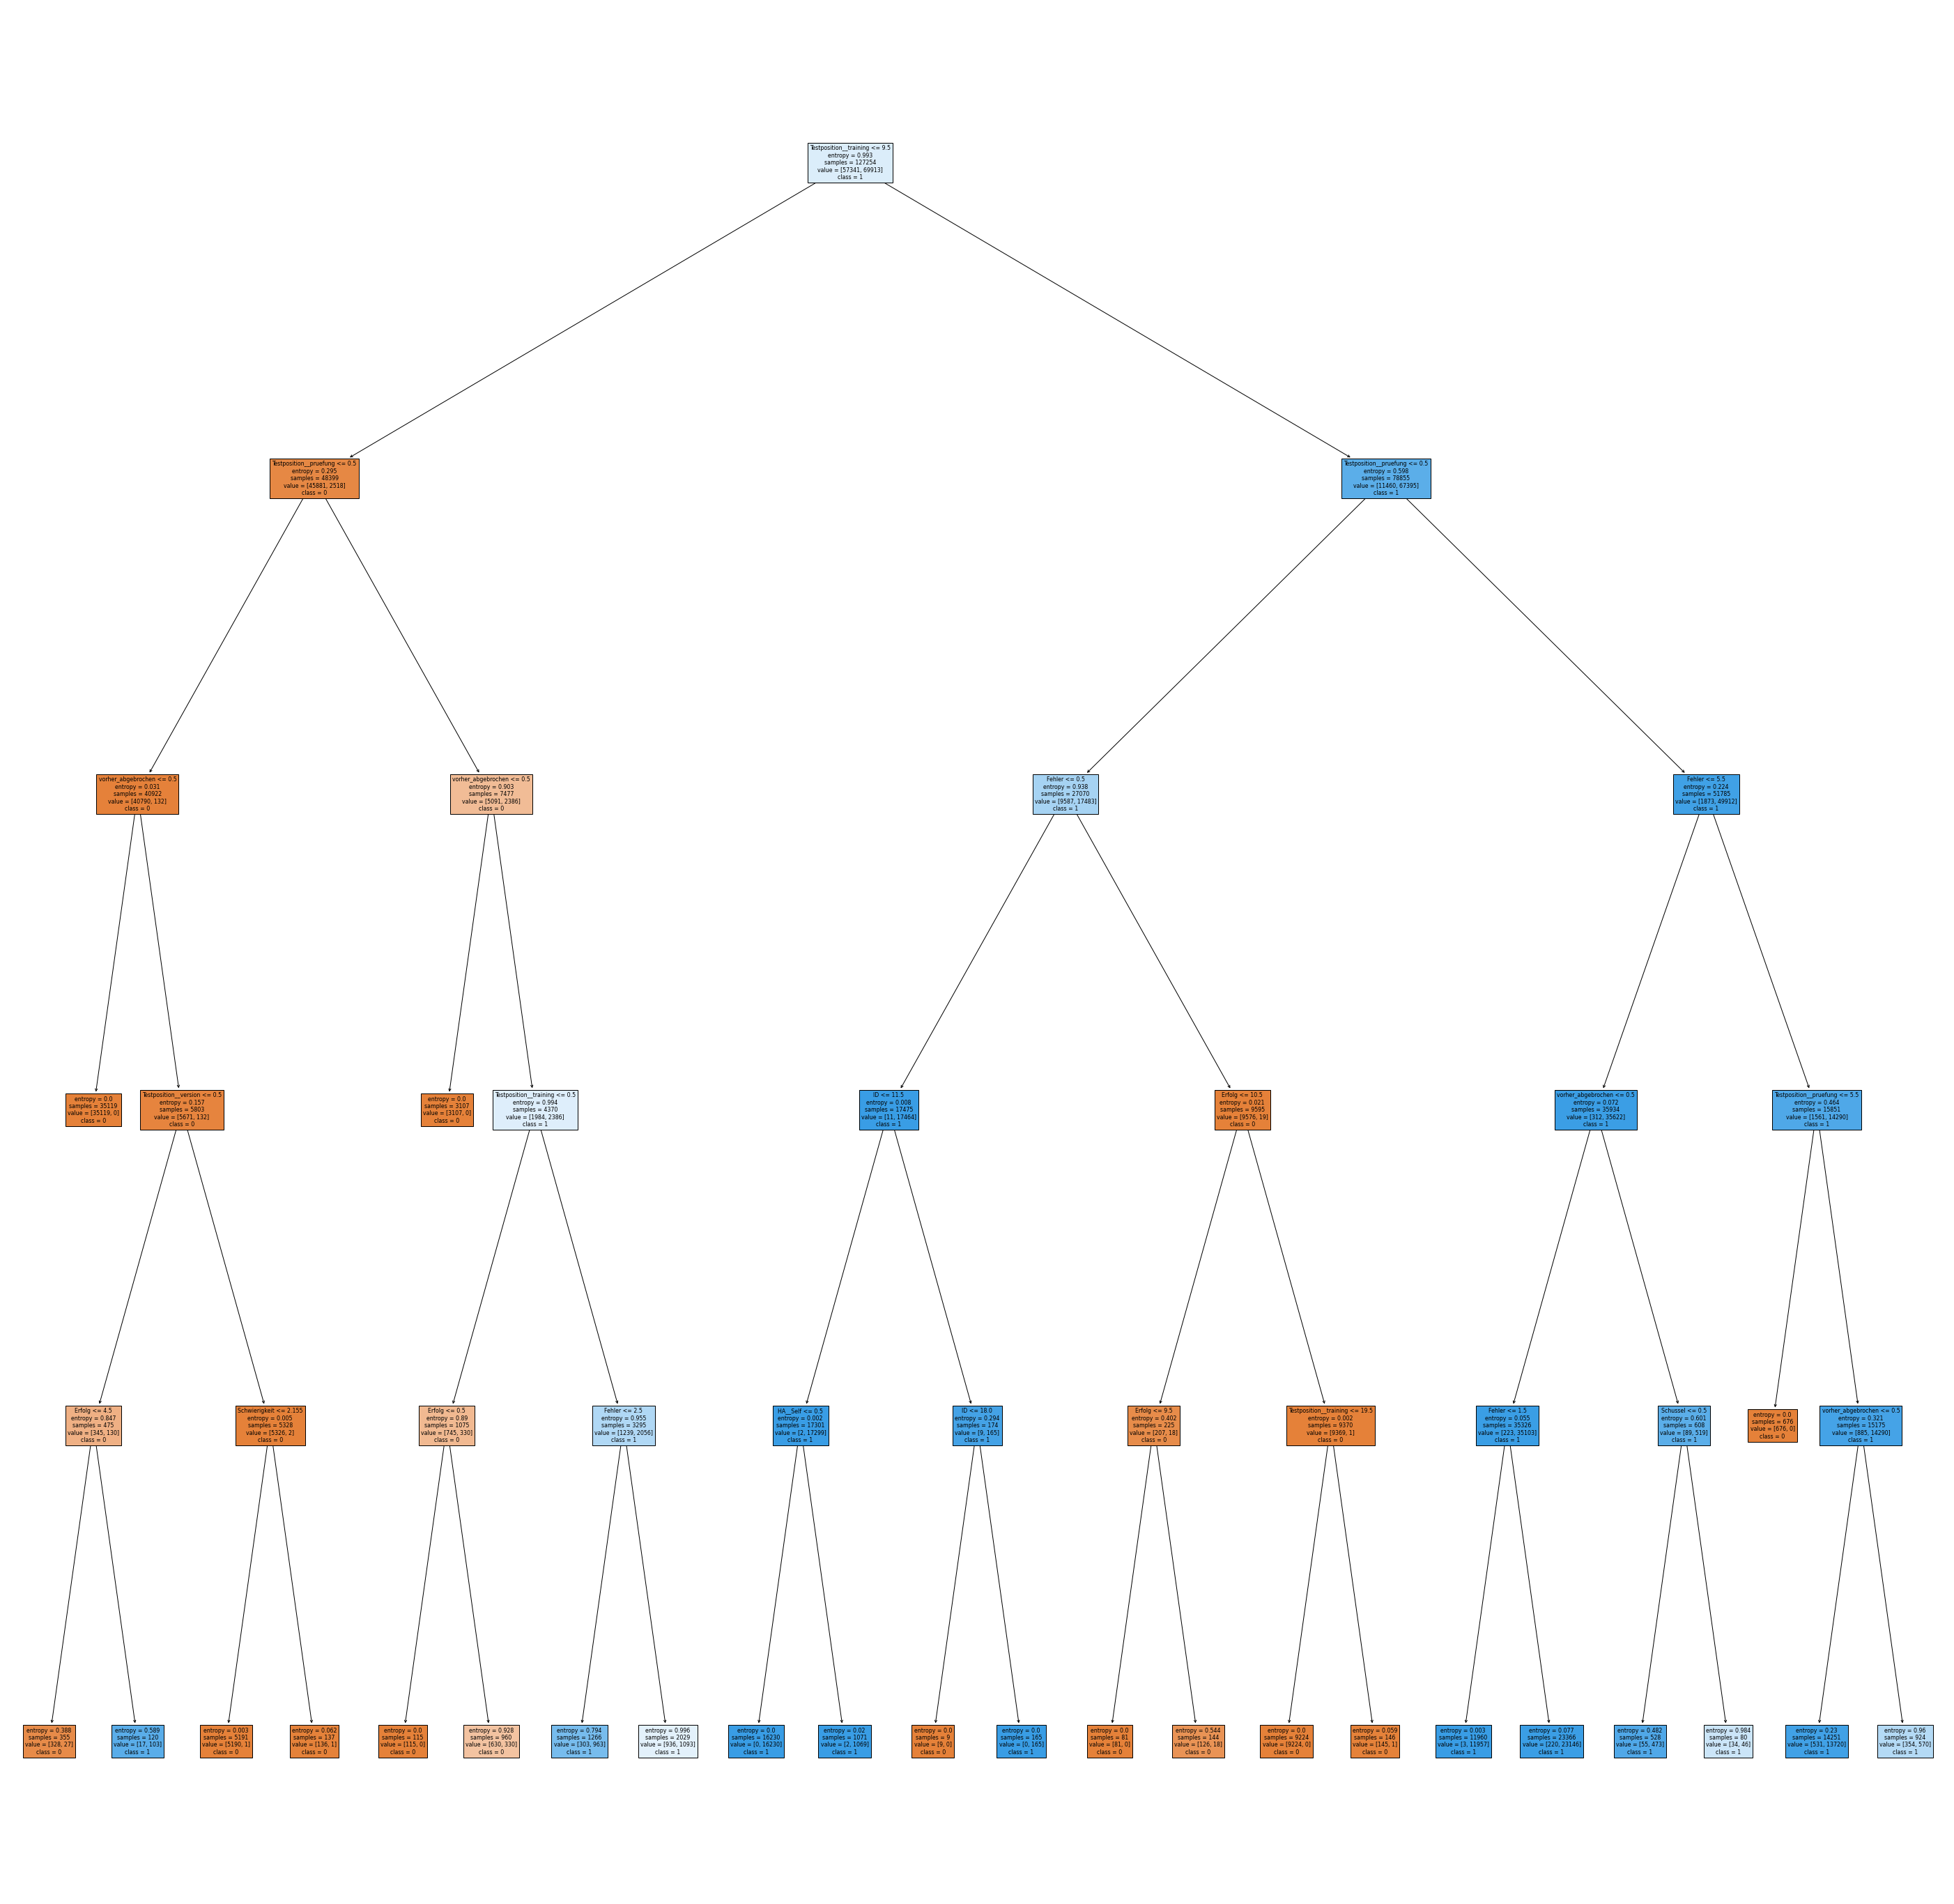

In [9]:
# entropy DT
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
metrics_model()

feature_cols = list(X.columns) 
target_cols = ['0','1']

fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=target_cols,
                   filled=True)

fig.savefig("decistion_tree.png")

[[23408  1043]
 [  168 29919]]


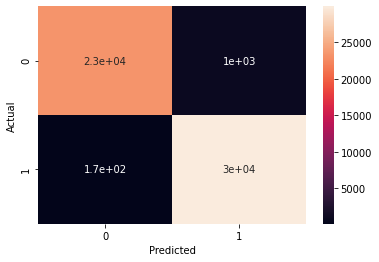

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
print(confusion_matrix(y_test, y_pred))

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()
